# Determine image dimentions, openCV

Code for detyermining proper scaled size for iamges using openCV.

In [8]:
!conda activate DS807
!pip install opencv-contrib-python

Unable to create process using 'C:\Users\jakob\anaconda3\envs\DS807\python.exe C:\Users\jakob\anaconda3\envs\DS807\Scripts\pip-script.py install opencv-contrib-python'


In [1]:
#import cv2
#print(cv2.__version__)
from IPython.display import Image
import matplotlib.pyplot as plt
import os

os.chdir("D:\DS807_exam\Kaggle_data\DIDA_12000_String_Digit_Images\DIDA_1")
os.getcwd()

'D:\\DS807_exam\\Kaggle_data\\DIDA_12000_String_Digit_Images\\DIDA_1'

In [96]:
img = cv2.imread("6815.jpg",0)
print("Image size is ", img.shape)
img

Image size is  (169, 409)


array([[127, 127, 127, ..., 117, 117, 116],
       [128, 128, 128, ..., 117, 117, 116],
       [129, 129, 129, ..., 117, 117, 117],
       ...,
       [ 84,  12,  28, ..., 117, 115, 117],
       [ 69,   6,  28, ..., 111, 108, 112],
       [ 42,  11,  36, ..., 112, 111, 111]], dtype=uint8)

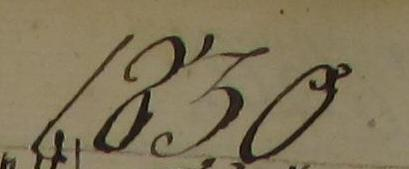

In [85]:
Image('6815.jpg')

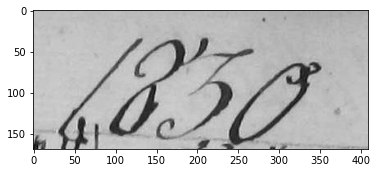

In [86]:
plt.imshow(img,cmap='gray')

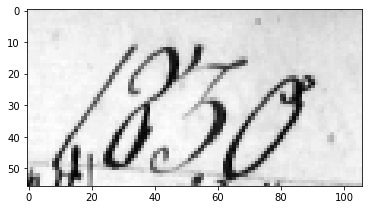

In [87]:
dim = (106, 56) #Define dimensions for dsize

# Resize background image to sae size as logo image
img_scale = cv2.resize(img, dsize = dim, interpolation=cv2.INTER_AREA) #Interpolation, different methods to call in documentation.
plt.imshow(img_scale, cmap = 'gray')

In [52]:
img_scale

array([[195, 197, 198, ..., 185, 189, 187],
       [198, 199, 198, ..., 191, 191, 191],
       [201, 200, 201, ..., 193, 193, 193],
       ...,
       [206, 205, 203, ..., 102, 136, 159],
       [205, 204, 205, ..., 145, 113,  83],
       [205, 206, 207, ..., 200, 206, 173]], dtype=uint8)

In [88]:
print(img_scale.shape)

(56, 106)


**We chose dimensions 56/106 for scaling!**

# Create CSV containing scaled images

Loop images, extract color values and append into pandas dataframe. 

### Import class labels

In [2]:
import pandas as pd

In [3]:
os.chdir('D:\DS807_exam\Anvendt_ML_Eskamens_project')
df = pd.read_csv("12k_labeled.csv", header = 0)
df

,index,string,CC,D,Y
0,1,1836,0,3,6
1,2,1836,0,3,6
2,3,1840,0,4,0
3,4,1840,0,4,0
4,5,1823,0,2,3
...,...,...,...,...,...
11995,11996,1808,0,0,8
11996,11997,1809,0,0,9
11997,11998,1840,0,4,0
11998,11999,1840,0,4,0


### Create function for scaling images and saving filenames

In [4]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import asarray

In [5]:
# goes through the folder containing the data and adds them to a list, generates labels and add data to validate labels against

def load_image_function(path):

    images = [] # empty list placeholder
    labels = [] # empty list placeholder
    container = [] # container to validate correct labels

    for filename in os.listdir(path):

      container.append(filename) # add filename to container

      CCDY_img = load_img(path + f'/{filename}', 
                          target_size = (56, 106), 
                          color_mode="grayscale") # standardize photo size + loads
        
      CCDY_img = img_to_array(CCDY_img).flatten() # creates an array for imagery values

      images.append(CCDY_img) # append the photo to the images. The images list contains a list of arrays
    
    return asarray(images), container; # not interested in list of arrays, but array containing lists. Asarray does this. Returns three arrays

In [6]:
os.chdir('D:\DS807_exam\Kaggle_data\DIDA_12000_String_Digit_Images\DIDA_1')
path = os.getcwd()

### Scale images, size 56/106 flattened to 1/5936

In [7]:
image_array, filename = load_image_function(path) # Resize images and grayscale them

In [8]:
print(len(image_array))
print(len(filename))

12000
12000


In [9]:
print((image_array[1]))
print('len:'+ str(len(image_array[1])))

[174. 177. 181. ... 186. 213. 211.]
len:5936


### Append image values to DF

In [10]:
img_df = pd.DataFrame({'filename': filename, 'gray_value': list(image_array)}, columns=['filename', 'gray_value'])
img_df

,filename,gray_value
0,1.jpg,"[166.0, 167.0, 166.0, 162.0, 164.0, 164.0, 166..."
1,10.jpg,"[174.0, 177.0, 181.0, 176.0, 174.0, 174.0, 176..."
2,100.jpg,"[190.0, 153.0, 122.0, 160.0, 184.0, 198.0, 213..."
3,1000.jpg,"[111.0, 114.0, 115.0, 115.0, 114.0, 119.0, 117..."
4,10000.jpg,"[113.0, 116.0, 125.0, 127.0, 129.0, 133.0, 135..."
...,...,...
11995,9995.jpg,"[147.0, 149.0, 151.0, 153.0, 149.0, 148.0, 144..."
11996,9996.jpg,"[171.0, 171.0, 171.0, 171.0, 171.0, 172.0, 171..."
11997,9997.jpg,"[171.0, 172.0, 170.0, 169.0, 167.0, 168.0, 169..."
11998,9998.jpg,"[137.0, 135.0, 137.0, 132.0, 134.0, 135.0, 136..."


In [12]:
len(img_df['gray_value'][0])

5936

### Merge image_DF with label DF

In [13]:
img_df['index'] = img_df['filename']
for i, row in img_df.iterrows():
    row['index'] = str(img_df['index'][i]).split('.')[0]
img_df

,filename,gray_value,index
0,1.jpg,"[166.0, 167.0, 166.0, 162.0, 164.0, 164.0, 166...",1
1,10.jpg,"[174.0, 177.0, 181.0, 176.0, 174.0, 174.0, 176...",10
2,100.jpg,"[190.0, 153.0, 122.0, 160.0, 184.0, 198.0, 213...",100
3,1000.jpg,"[111.0, 114.0, 115.0, 115.0, 114.0, 119.0, 117...",1000
4,10000.jpg,"[113.0, 116.0, 125.0, 127.0, 129.0, 133.0, 135...",10000
...,...,...,...
11995,9995.jpg,"[147.0, 149.0, 151.0, 153.0, 149.0, 148.0, 144...",9995
11996,9996.jpg,"[171.0, 171.0, 171.0, 171.0, 171.0, 172.0, 171...",9996
11997,9997.jpg,"[171.0, 172.0, 170.0, 169.0, 167.0, 168.0, 169...",9997
11998,9998.jpg,"[137.0, 135.0, 137.0, 132.0, 134.0, 135.0, 136...",9998


In [14]:
df['index'] = df['index'].astype(int)
img_df['index'] = img_df['index'].astype(int)

In [15]:
df

,index,string,CC,D,Y
0,1,1836,0,3,6
1,2,1836,0,3,6
2,3,1840,0,4,0
3,4,1840,0,4,0
4,5,1823,0,2,3
...,...,...,...,...,...
11995,11996,1808,0,0,8
11996,11997,1809,0,0,9
11997,11998,1840,0,4,0
11998,11999,1840,0,4,0


In [16]:
img_df

,filename,gray_value,index
0,1.jpg,"[166.0, 167.0, 166.0, 162.0, 164.0, 164.0, 166...",1
1,10.jpg,"[174.0, 177.0, 181.0, 176.0, 174.0, 174.0, 176...",10
2,100.jpg,"[190.0, 153.0, 122.0, 160.0, 184.0, 198.0, 213...",100
3,1000.jpg,"[111.0, 114.0, 115.0, 115.0, 114.0, 119.0, 117...",1000
4,10000.jpg,"[113.0, 116.0, 125.0, 127.0, 129.0, 133.0, 135...",10000
...,...,...,...
11995,9995.jpg,"[147.0, 149.0, 151.0, 153.0, 149.0, 148.0, 144...",9995
11996,9996.jpg,"[171.0, 171.0, 171.0, 171.0, 171.0, 172.0, 171...",9996
11997,9997.jpg,"[171.0, 172.0, 170.0, 169.0, 167.0, 168.0, 169...",9997
11998,9998.jpg,"[137.0, 135.0, 137.0, 132.0, 134.0, 135.0, 136...",9998


In [17]:
df_img_classes = df.merge(img_df)
df_img_classes = df_img_classes.reindex(columns= ['index', 'string', 'CC', 'D', 'Y', 'gray_value', 'filename'])
df_img_classes

,index,string,CC,D,Y,gray_value,filename
0,1,1836,0,3,6,"[166.0, 167.0, 166.0, 162.0, 164.0, 164.0, 166...",1.jpg
1,2,1836,0,3,6,"[169.0, 168.0, 169.0, 170.0, 166.0, 164.0, 164...",2.jpg
2,3,1840,0,4,0,"[167.0, 169.0, 169.0, 166.0, 165.0, 168.0, 169...",3.jpg
3,4,1840,0,4,0,"[167.0, 165.0, 165.0, 165.0, 163.0, 161.0, 162...",4.jpg
4,5,1823,0,2,3,"[62.0, 45.0, 45.0, 37.0, 40.0, 33.0, 46.0, 64....",5.jpg
...,...,...,...,...,...,...,...
11995,11996,1808,0,0,8,"[88.0, 62.0, 60.0, 68.0, 61.0, 101.0, 132.0, 1...",11996.jpg
11996,11997,1809,0,0,9,"[173.0, 171.0, 173.0, 175.0, 174.0, 174.0, 175...",11997.jpg
11997,11998,1840,0,4,0,"[189.0, 189.0, 189.0, 189.0, 189.0, 187.0, 186...",11998.jpg
11998,11999,1840,0,4,0,"[191.0, 192.0, 192.0, 192.0, 193.0, 191.0, 191...",11999.jpg


In [20]:
type(df_img_classes['gray_value'][0])

numpy.ndarray

In [67]:
df_img_classes.to_csv('12k_img.csv', index = False, sep = ',', header = True)